<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/1.TF-Intro/TF_Intro4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Getting the dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [21]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [22]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')      # Directory with our training horse pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')      # Directory with our training human pictures

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [23]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse08-6.png', 'horse07-7.png', 'horse04-9.png', 'horse50-9.png', 'horse45-3.png', 'horse09-9.png', 'horse22-4.png', 'horse32-0.png', 'horse07-1.png', 'horse07-8.png']
['human02-01.png', 'human02-05.png', 'human17-08.png', 'human04-20.png', 'human15-20.png', 'human05-03.png', 'human10-01.png', 'human10-05.png', 'human07-27.png', 'human14-30.png']
['horse5-103.png', 'horse5-488.png', 'horse3-416.png', 'horse2-596.png', 'horse1-298.png', 'horse3-498.png', 'horse6-089.png', 'horse4-599.png', 'horse4-403.png', 'horse1-122.png']
['valhuman03-07.png', 'valhuman03-20.png', 'valhuman04-09.png', 'valhuman05-01.png', 'valhuman02-02.png', 'valhuman03-00.png', 'valhuman01-03.png', 'valhuman02-21.png', 'valhuman03-23.png', 'valhuman01-17.png']


In [24]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


##Visualizing data

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nrows = 4
ncols = 4

pic_index = 0

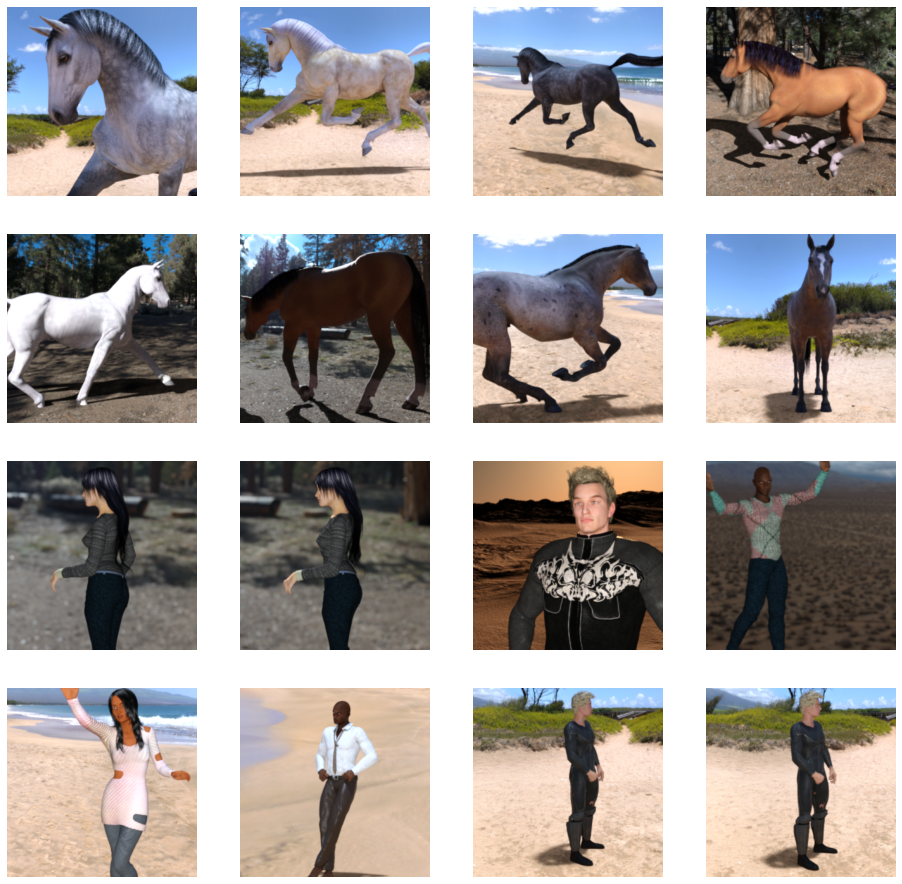

In [26]:
#Displaying batch of 8 humans and 8 hourses
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Model

In [27]:
import tensorflow as tf

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),                
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300, 300), 
    batch_size = 128,
    class_mode = 'binary',
)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/', 
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 7s 877ms/step - loss: 1.0499 - accuracy: 0.5028 - val_loss: 0.6753 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 911ms/step - loss: 0.6685 - accuracy: 0.7152 - val_loss: 3.2202 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 7s 908ms/step - loss: 1.2101 - accuracy: 0.7642 - val_loss: 0.5044 - val_accuracy: 0.7852
Epoch 4/15
8/8 [==============================] - 7s 911ms/step - loss: 0.4958 - accuracy: 0.7608 - val_loss: 1.6373 - val_accuracy: 0.6797
Epoch 5/15
8/8 [==============================] - 7s 929ms/step - loss: 0.5324 - accuracy: 0.8009 - val_loss: 0.4626 - val_accuracy: 0.8477
Epoch 6/15
8/8 [==============================] - 7s 905ms/step - loss: 0.2636 - accuracy: 0.8954 - val_loss: 1.1580 - val_accuracy: 0.7969
Epoch 7/15
8/8 [==============================] - 7s 907ms/step - loss: 0.6543 - accuracy: 0.8532 - val_loss: 1.1437 - val_accuracy: 0.7148
Epoch 8/15
8/8 [====

##Testing on custom images

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

##Visualizing intermediate filters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


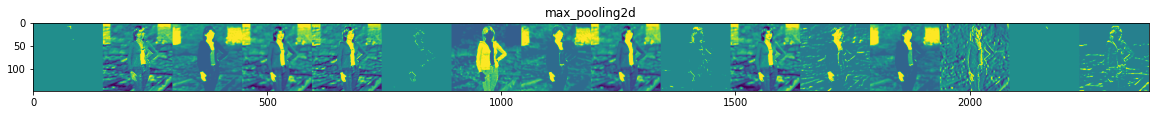

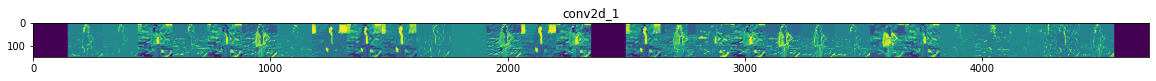

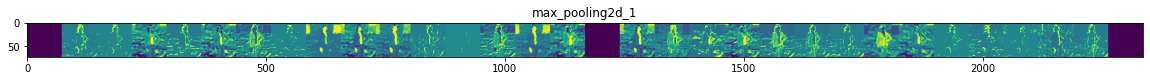

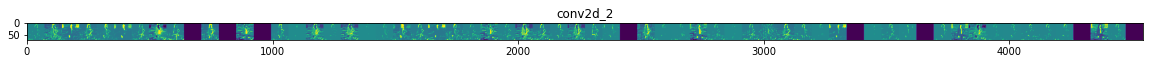

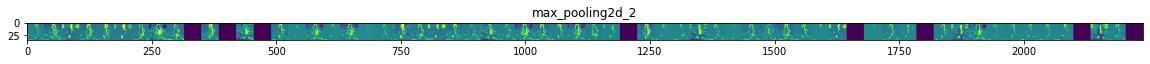

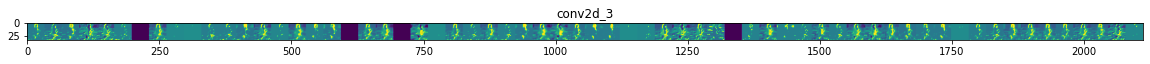

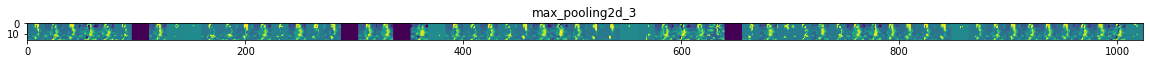

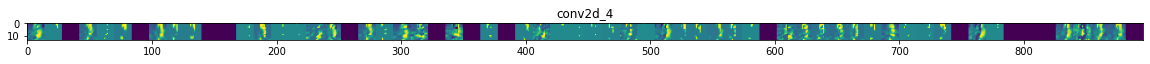

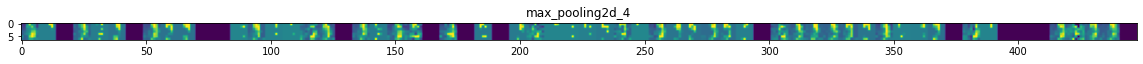

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

##Exercises